In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, models

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Fetch and Load Data

In [79]:
df = pd.read_csv('data/winequality-red.csv')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


EDA and Data Preparation

In [80]:
df.shape

(1599, 12)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [82]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [83]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


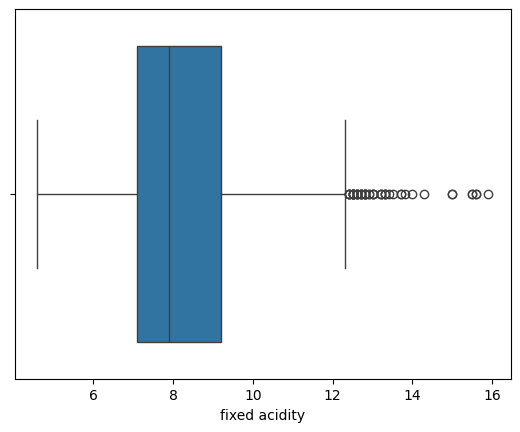

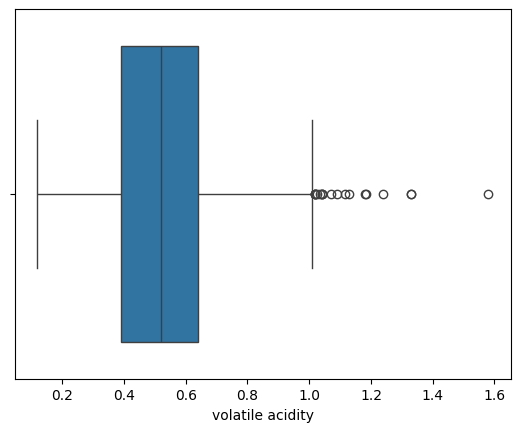

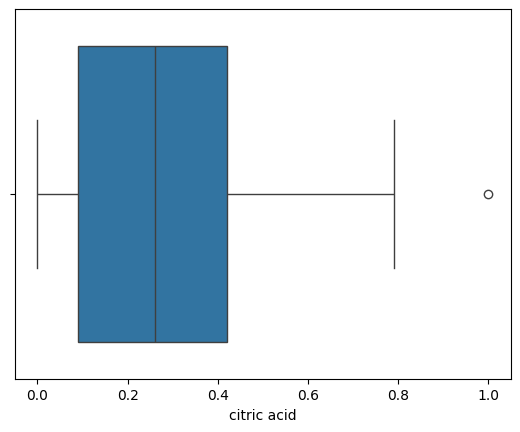

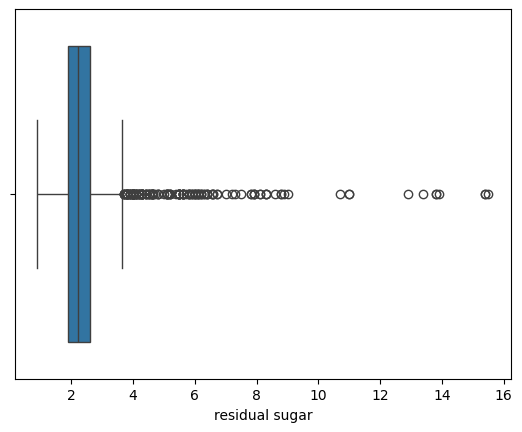

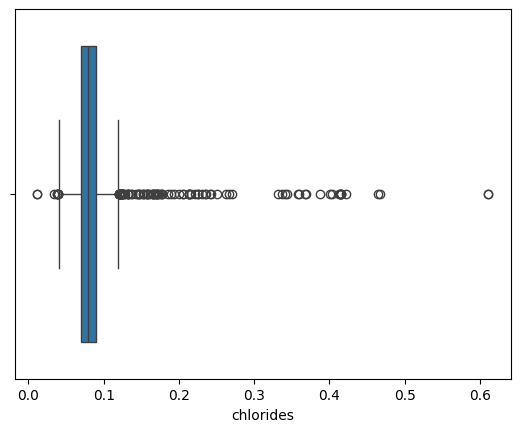

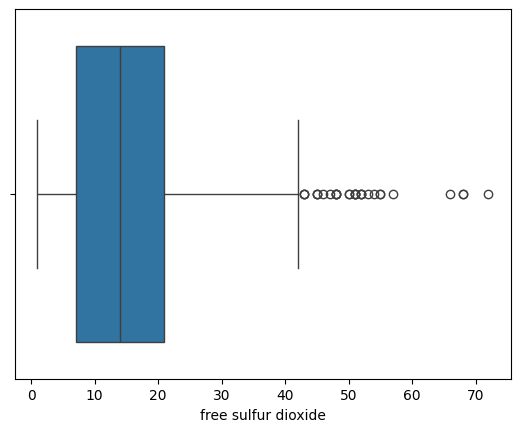

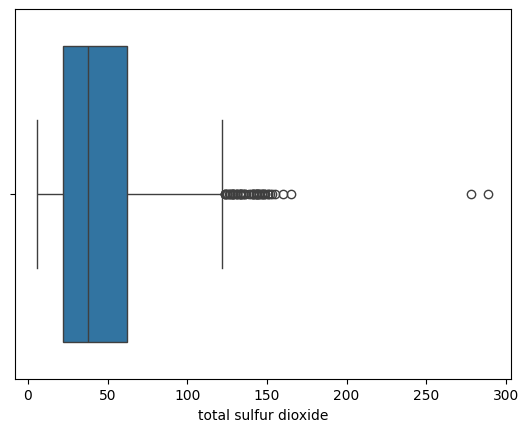

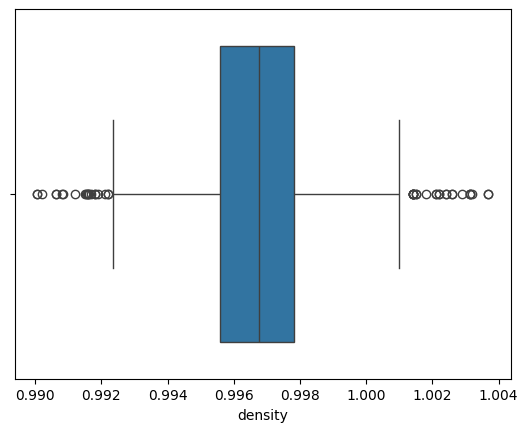

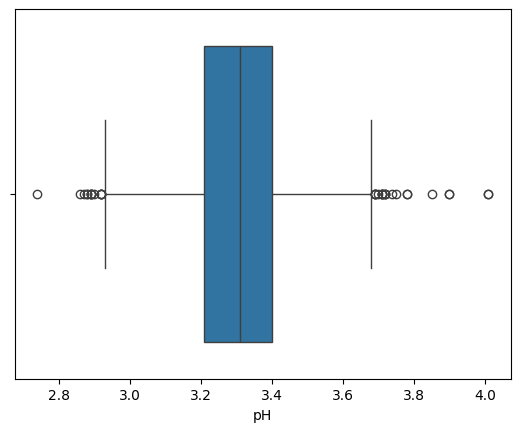

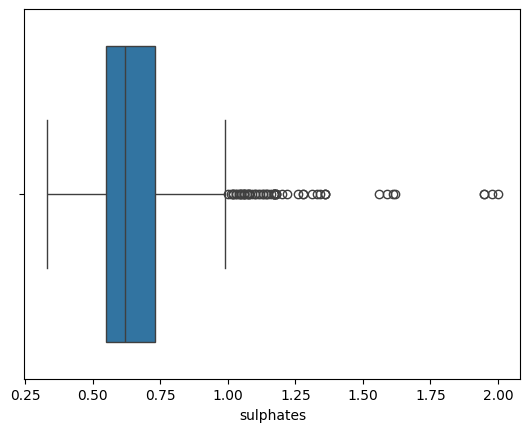

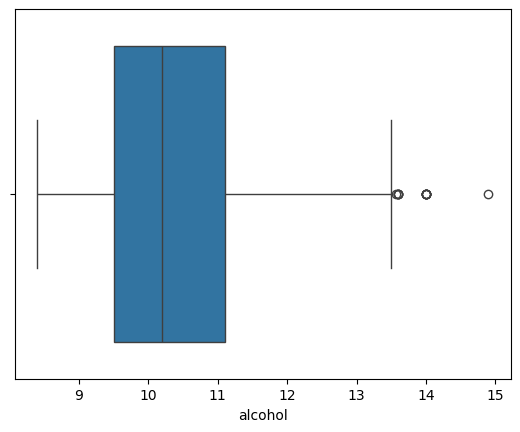

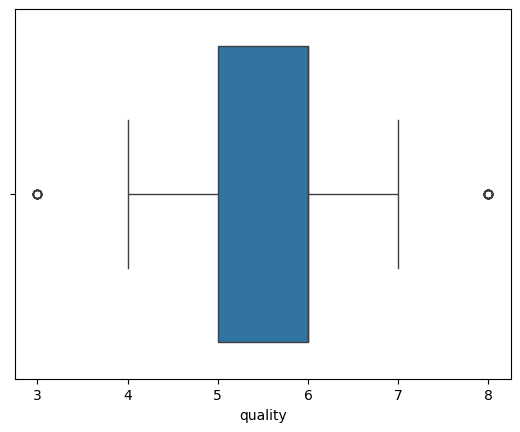

In [84]:
# Detect Outliers with box_plots
for i in df.columns:
    sns.boxplot(x=df[i])
    plt.show()

<Axes: >

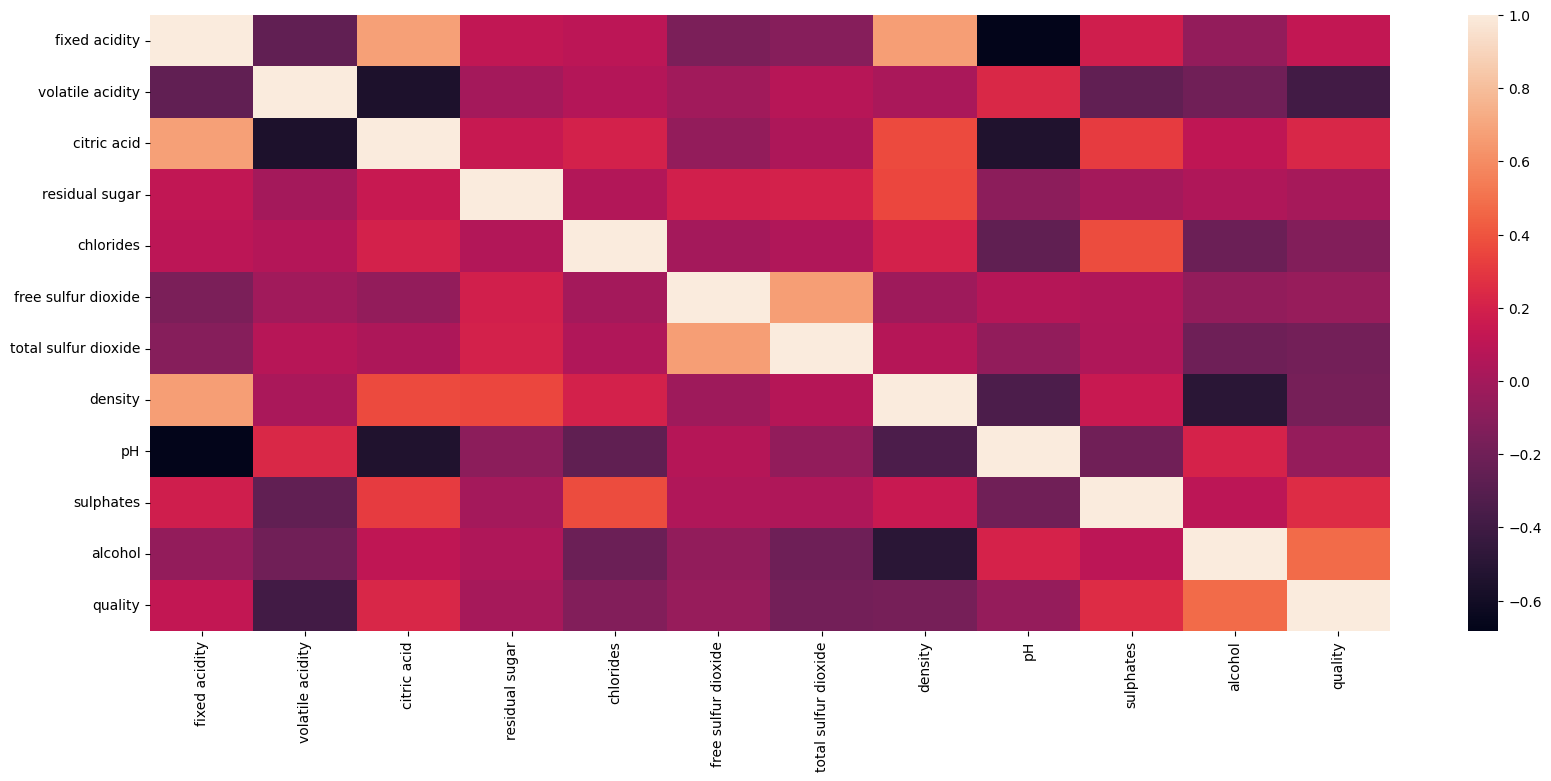

In [85]:
#plot heatmap
plt.figure(figsize=(20,8))
sns.heatmap(data=df.corr())

In [86]:
# create a copy of df for visualization
df_copy = df.copy()

<Axes: xlabel='quality', ylabel='count'>

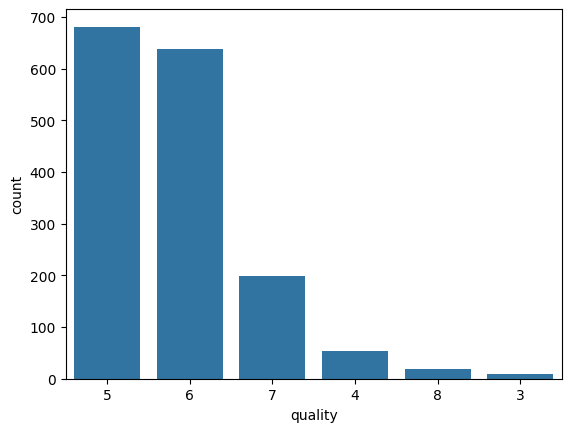

In [87]:
#Comparing count of quality categories
df_copy.quality = df_copy.quality.map({0:'0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8', 9:'9',10:'10'})
sns.countplot(x='quality', data=df_copy)

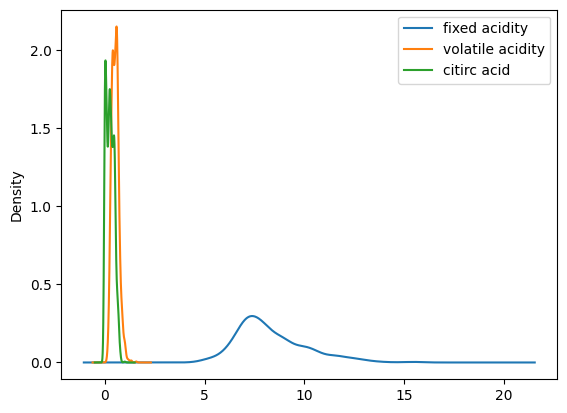

In [88]:
# Use kde plot to view distribution
df_copy['fixed acidity'].plot.kde(label='fixed acidity')
df_copy['volatile acidity'].plot.kde(label='volatile acidity')
df_copy['citric acid'].plot.kde(label='citirc acid')
plt.legend()
plt.show()

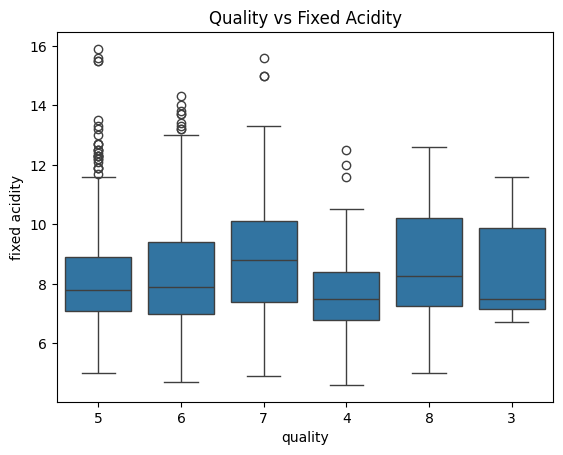

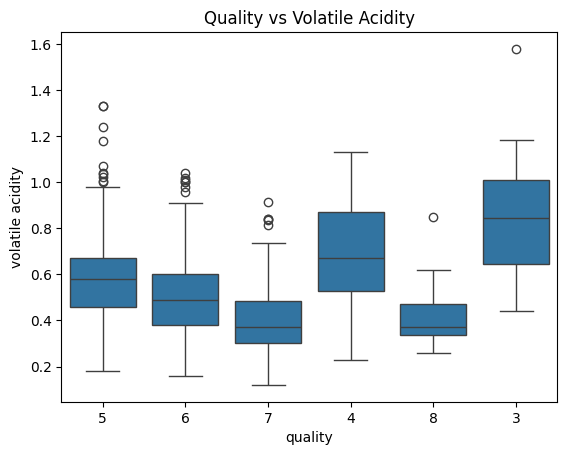

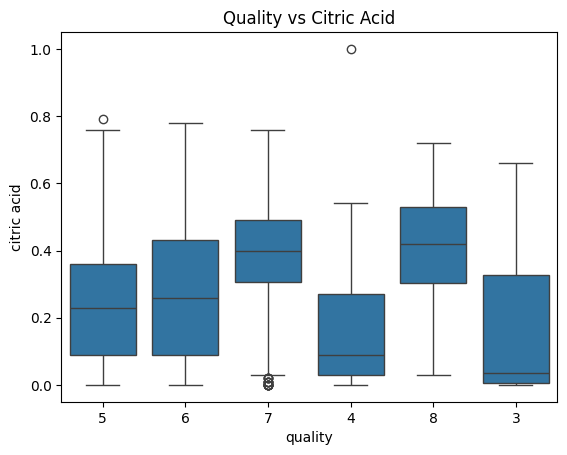

In [89]:
# Compare quality with fixed acidity
sns.boxplot(x=df_copy['quality'], y=df_copy['fixed acidity'])
plt.title('Quality vs Fixed Acidity')
plt.show() 

# Compare quality with volatile acidity
sns.boxplot(x=df_copy['quality'], y=df_copy['volatile acidity'])
plt.title('Quality vs Volatile Acidity')
plt.show() 

# Compare quality with citric acid
sns.boxplot(x=df_copy['quality'], y=df_copy['citric acid'])
plt.title('Quality vs Citric Acid')
plt.show() 



Define Keras Model

In [90]:
# Split dataset into input and output
X = df.drop(['quality'], axis=1)
y = df.quality
print(X.head(3))
print(X.shape)
print('--------------')
print(y.head(3))
print(y.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
(1599, 11)
--------------
0    5
1    5
2    5
Name: quality, dtype: int64
(1599,)


In [91]:
# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
print(X_train.head(3))
print(X_train.shape)
print('----')
print(y_train.head(3))
print(y_train.shape)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
543           11.2              0.66         0.24             2.5      0.085   
828            7.8              0.57         0.09             2.3      0.065   
272           10.9              0.37         0.58             4.0      0.071   

     free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
543                 16.0                  53.0  0.99930  3.06       0.72   
828                 34.0                  45.0  0.99417  3.46       0.74   
272                 17.0                  65.0  0.99935  3.22       0.78   

     alcohol  
543     11.0  
828     12.7  
272     10.1  
(1119, 11)
----
543    6
828    8
272    5
Name: quality, dtype: int64
(1119,)


In [92]:
# Define keras model
model = keras.Sequential()
model.add(layers.Dense(11, activation = 'relu', input_shape=(X_train.shape[1], )))
model.add(layers.Dense(5, activation = 'relu'))
model.add(layers.Dense(10, activation = 'softmax'))

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Fit Keras Model

In [93]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
history = model.fit(X_train, y_train, validation_split=0.22, batch_size=100, epochs = 100)
model.summary()

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.1451 - loss: 2.3874 - val_accuracy: 0.2753 - val_loss: 2.3059
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3338 - loss: 2.3001 - val_accuracy: 0.4453 - val_loss: 2.2487
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4116 - loss: 2.2421 - val_accuracy: 0.4534 - val_loss: 2.2049
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4363 - loss: 2.1988 - val_accuracy: 0.4534 - val_loss: 2.1550
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4290 - loss: 2.1552 - val_accuracy: 0.4534 - val_loss: 2.0734
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4413 - loss: 2.0602 - val_accuracy: 0.4534 - val_loss: 1.9201
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4296 - loss: 1.9043 - val_accuracy: 0.4534 - val_loss: 1.6523
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4369 - loss: 1.6237 - val_accuracy: 0.4534 - val_loss: 1.4030

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 5)              │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 758 (2.96 KB)

 Trainable params: 252 (1008.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 506 (1.98 KB)

Visualize Training

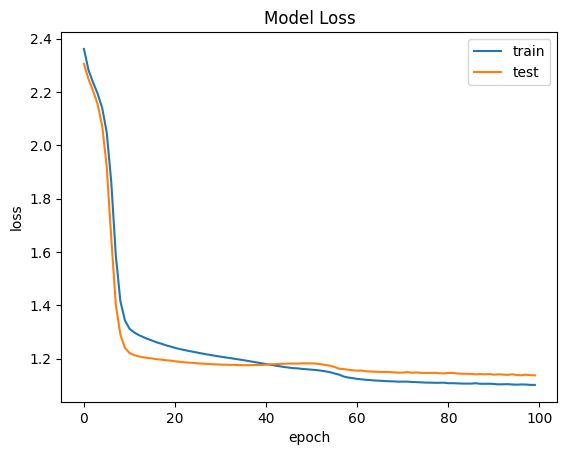

In [94]:
# plt Loss vs Epochs
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'test'])
plt.show()

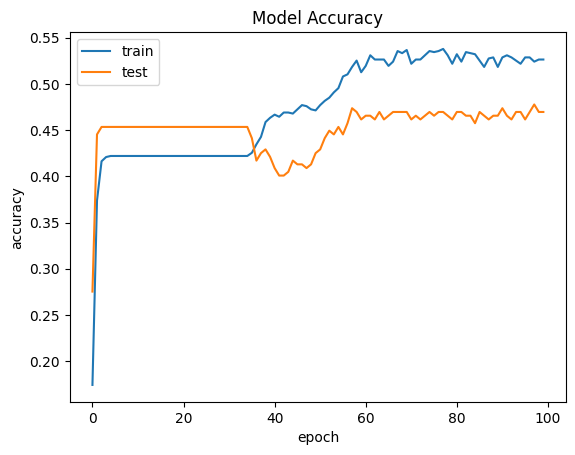

In [95]:
# plt Loss vs Accuracy
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('Model Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

Evaluate Model

In [96]:
# Predict class probabilities
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)

# Print predicted probabilities (optional for debugging)
print("Predicted Probabilities:")
print(y_pred_prob)
print('------------------')

# Print predicted class labels
print("Predicted Class Labels:")
print(y_pred)
print('------------------')

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Predicted Probabilities:
[[1.1147114e-03 3.9960310e-04 1.4044401e-03 ... 1.5804130e-01
  2.5248867e-02 3.7530786e-04]
 [5.1156565e-04 5.3697560e-05 4.1303548e-04 ... 9.7412691e-02
  7.0014927e-03 1.1168492e-04]
 [1.0760457e-04 3.1460101e-07 1.9784651e-05 ... 1.2466182e-02
  1.2293515e-04 8.3308923e-06]
 ...
 [1.0057948e-04 9.3632815e-07 3.2693079e-05 ... 2.6980551e-02
  4.2618407e-04 9.7238035e-06]
 [2.0670155e-05 1.8767523e-08 2.7104550e-06 ... 5.9994911e-03
  2.3544855e-05 9.5261225e-07]
 [4.1744605e-04 1.9732308e-04 6.7859102e-04 ... 1.7506465e-01
  2.5040410e-02 1.2789438e-04]]
------------------
Predicted Class Labels:
[6 5 5 6 6 6 5 5 5 6 5 6 6 5 6 6 5 6 6 6 6 6 6 6 6 5 6 6 6 6 6 6 6 5 6 5 6
 6 5 5 6 6 6 6 6 6 6 5 6 6 5 6 5 5 6 5 6 6 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 5
 5 6 5 6 6 6 5 5 5 6 6 5 5 6 6 5 6 6 6 5 6 5 6 6 6 6 6 6 6 6 6 6 5 5 6 5 6
 5 6 6 6 6 6 6 6 6 6 6 5 5 6 5 6 5 6 5 6 5 6 6 6 6 6 5 6 6 6 6 5 6 6 5 6 6
 6 5 5 5 6 6 6 6 6 5 6 6 5 5

In [97]:
# Determine the number of unique classes in the target variable
num_classes = len(np.unique(y_test))

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')
print('--------------------------------')

# Compute and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print('--------------------------------')

# Print classification report
report = classification_report(y_test, y_pred, target_names=[f'Class {i}' for i in range(num_classes)])
print("Classification Report:")
print(report)

Test Accuracy: 0.4833
--------------------------------
Confusion Matrix:
[[  0   0   0   3   0   0]
 [  0   0   4   9   0   0]
 [  0   0  84 117   0   0]
 [  0   0  45 148   0   0]
 [  0   0   7  57   0   0]
 [  0   0   0   6   0   0]]
--------------------------------
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00         3
     Class 1       0.00      0.00      0.00        13
     Class 2       0.60      0.42      0.49       201
     Class 3       0.44      0.77      0.56       193
     Class 4       0.00      0.00      0.00        64
     Class 5       0.00      0.00      0.00         6

    accuracy                           0.48       480
   macro avg       0.17      0.20      0.17       480
weighted avg       0.43      0.48      0.43       480



d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

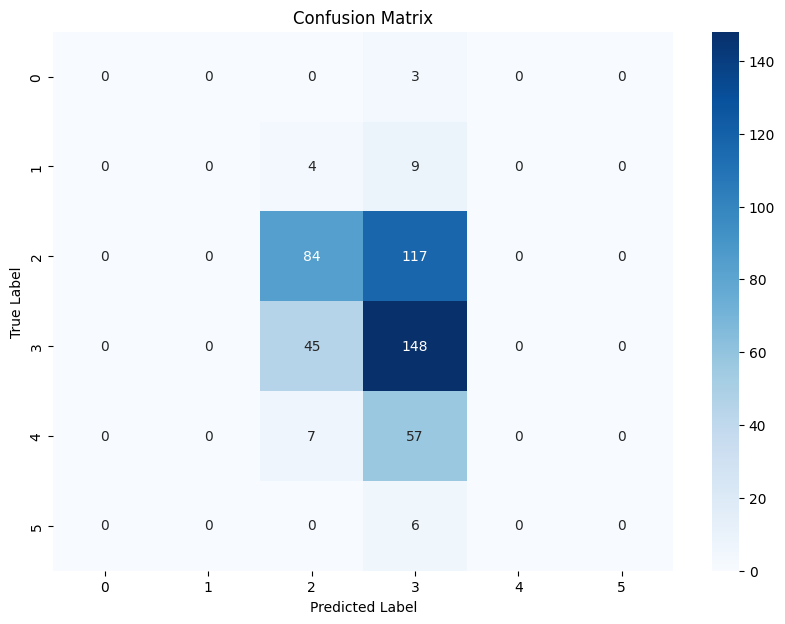

In [98]:
# Determine the number of unique classes in the target variable
num_classes = len(np.unique(y_test))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(num_classes), yticklabels=range(num_classes))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Make Prediction

In [135]:
# input for 11 new features
# Xnew = np.array([[6.0,98,0,1001,0.6,0.069,9.10,0.64,7.3,10.46,0 ]], dtype=np.float64)
Xnew = np.array([[7.6,0.31,0.34,2.5,0.081,26.0,35.0,0.99356,3.22,0.59,12.5 ]], dtype=np.float64)

#Making the prediction
ynew = model.predict(Xnew)
print(ynew) #array of 10 probability values. One for each quality class

max_index_row=np.argmax(ynew, axis=1)
print(max_index_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
[[4.1891268e-05 1.6134050e-05 8.4576059e-05 5.1442743e-04 3.2930009e-02
  2.2993621e-01 5.6391197e-01 1.6089389e-01 1.1662555e-02 8.3214454e-06]]
[6]


Serialize and Save MOdel for Later Use

In [137]:
#save model
model.save('model/wine.keras')

In [140]:
#load saved model
from tensorflow.keras.models import load_model

loaded_model=load_model('model/wine.keras')

d:\Users\Sean\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 8 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [141]:
# Make Prediction with loaded model
# Xnew = np.array([[6.0,98,0,1001,0.6,0.069,9.10,0.64,7.3,10.46,0 ]], dtype=np.float64)
Xnew = np.array([[7.6,0.31,0.34,2.5,0.081,26.0,35.0,0.99356,3.22,0.59,12.5 ]], dtype=np.float64)

#Making the prediction
ynew = loaded_model.predict(Xnew)
print(ynew) #array of 10 probability values. One for each quality class

max_index_row=np.argmax(ynew, axis=1)
print(max_index_row)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
[[4.1891268e-05 1.6134050e-05 8.4576059e-05 5.1442743e-04 3.2930009e-02
  2.2993621e-01 5.6391197e-01 1.6089389e-01 1.1662555e-02 8.3214454e-06]]
[6]
